# **1. INSTALL DEPENDENCY**

In [1]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [2]:
!pip install open-iris

INFO: pip is looking at multiple versions of contourpy to determine which version is compatible with other requirements. This could take a while.
Reason for being yanked: Deprecated, use 4.7.0.71
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 35.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 76.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 32.3 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 85.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 31.3 MB/s  0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 97.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.7/757.7 kB 40.2 MB/s  0:00:00
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0.2
    Uninstalling PyYAML-6.0.2:
      Successfully uninstalled PyYAML-6.0.2
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.11.7
    Uninstalling pydantic-2.11.7:
      

# **2. PROCESS DATASET**

## *UNZIP DATASET*

In [1]:
COLAB_DIR = "/content/DATASET"
!cp -r "/content/drive/MyDrive/Colab Notebooks/DATASET" "/content/"

In [2]:
!unzip "$COLAB_DIR/images.zip" -d "$COLAB_DIR"
!rm "$COLAB_DIR/images.zip"

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/DATASET/images/782/R/S5782R02.jpg  
  inflating: /content/DATASET/images/782/R/S5782R03.jpg  
  inflating: /content/DATASET/images/782/R/S5782R04.jpg  
  inflating: /content/DATASET/images/782/R/S5782R05.jpg  
  inflating: /content/DATASET/images/782/R/S5782R06.jpg  
  inflating: /content/DATASET/images/782/R/S5782R07.jpg  
  inflating: /content/DATASET/images/782/R/S5782R08.jpg  
  inflating: /content/DATASET/images/782/R/S5782R09.jpg  
   creating: /content/DATASET/images/783/
   creating: /content/DATASET/images/783/L/
  inflating: /content/DATASET/images/783/L/S5783L00.jpg  
  inflating: /content/DATASET/images/783/L/S5783L01.jpg  
  inflating: /content/DATASET/images/783/L/S5783L02.jpg  
  inflating: /content/DATASET/images/783/L/S5783L03.jpg  
  inflating: /content/DATASET/images/783/L/S5783L04.jpg  
  inflating: /content/DATASET/images/783/L/S5783L05.jpg  
  inflating: /content/DATASET/images/783/L/S5

## *LOAD DATASET*

In [3]:
import os
from glob import glob

In [4]:
BASE_PATH = COLAB_DIR
all_files = glob(os.path.join(BASE_PATH, "**", "*.jpg"), recursive=True)
all_files.sort()

print(f"TOTAL: {len(all_files)}")
print(f"STRUCTURE: {all_files[0]}")

TOTAL: 20000
STRUCTURE: /content/DATASET/images/000/L/S5000L00.jpg


# **3. SEGMENT DATASET**

In [5]:
import iris

## *TEST*

### *SEGMENTATION*

In [6]:
PATH_IMG = f"{BASE_PATH}/images/000/R/S5000R00.jpg"
SIDE_IMG = "left" if PATH_IMG.split("/")[-2] == "L" else "right"

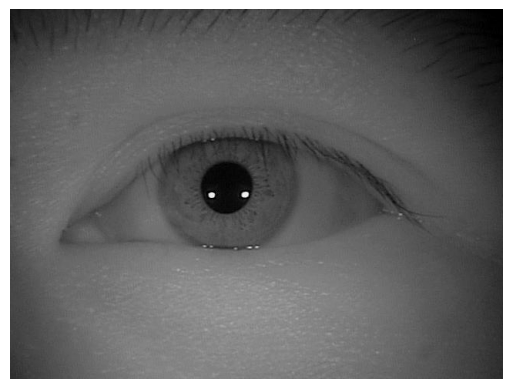

In [7]:
import cv2
import matplotlib.pyplot as plt


img_pixels = cv2.imread(PATH_IMG, cv2.IMREAD_GRAYSCALE)
plt.imshow(img_pixels, cmap='gray')
plt.axis('OFF')
plt.show()

In [8]:
iris_pipeline = iris.IRISPipeline()

iris_semseg_upp_scse_mobilenetv2.onnx:   0%|          | 0.00/56.1M [00:00<?, ?B/s]

In [9]:
output = iris_pipeline(img_data=img_pixels, eye_side=SIDE_IMG)

In [10]:
output["error"] is None

True

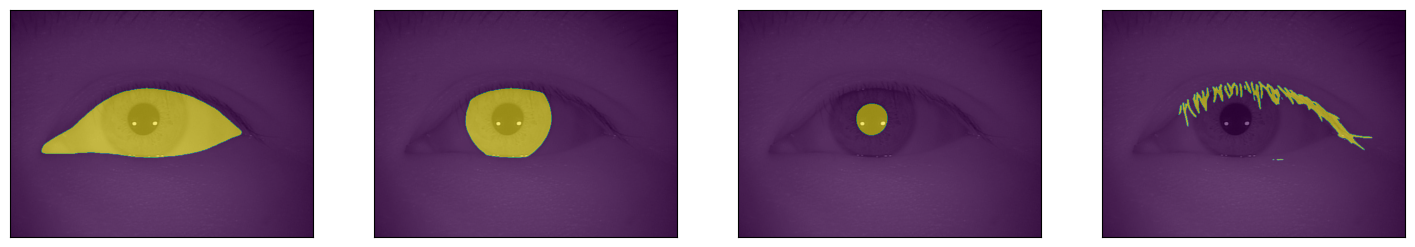

In [11]:
iris_visualizer = iris.visualisation.IRISVisualizer()

canvas = iris_visualizer.plot_segmentation_map(
    ir_image=iris.IRImage(img_data=img_pixels, eye_side=SIDE_IMG),
    segmap=iris_pipeline.call_trace['segmentation'],
)
plt.show()

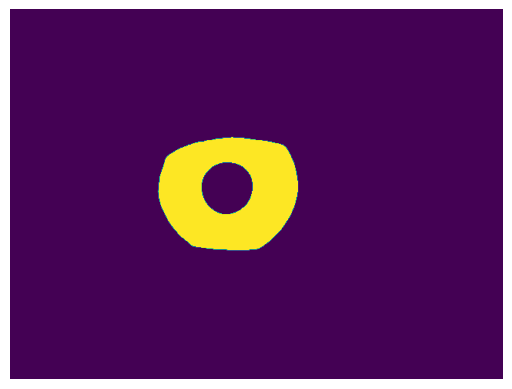

In [12]:
import numpy as np
import matplotlib.pyplot as plt


# KẾT QUẢ SEGMENTATION.
segmentation_data = iris_pipeline.call_trace['segmentation']
segmentation_maps = segmentation_data.predictions
mask_iris = segmentation_maps[:, :, 1]
mask_pupil = segmentation_maps[:, :, 2]
# GIỮ LẠI PHẦN IRIS, LOẠI BỎ PUPIL.
mask_result = mask_iris - mask_pupil
# HIỂN THỊ KẾT QUẢ.
plt.imshow(mask_result)
plt.axis('OFF')
plt.show()

In [13]:
PATH_OUTPUT = PATH_IMG.split("/")
PATH_OUTPUT[3] = "masks"
PATH_OUTPUT.insert(0, "/")

PATH_FOLDER = os.path.join(*PATH_OUTPUT[:-1]) + "/"
PATH_FILE = os.path.join(*PATH_OUTPUT)

os.makedirs(os.path.dirname(PATH_FOLDER), exist_ok=True)

In [14]:
# CHUẨN HÓA VỀ 0-255
mask_norm = (mask_result - mask_result.min()) / (mask_result.max() - mask_result.min())
mask_uint8 = (mask_norm * 255).astype(np.uint8)
# XUẤT RA FILE.
cv2.imwrite(PATH_FILE, mask_uint8)

True

### *ROI EXTRACTION*

In [15]:
import numpy as np


# CHUẨN HÓA VỀ 0-255
mask_norm = (mask_result - mask_result.min()) / (mask_result.max() - mask_result.min())
mask_uint8 = (mask_norm * 255).astype(np.uint8)
# TÌM TỌA ĐỘ TL & BR.
ys, xs = np.where(mask_uint8 > 0)
x_min, y_min = xs.min(), ys.min()
x_max, y_max = xs.max(), ys.max()

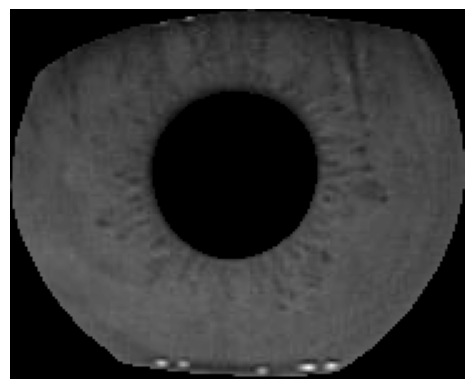

In [16]:
iris_segmentation = img_pixels * mask_result
iris_cropped = iris_segmentation[y_min:y_max+1, x_min:x_max+1]

plt.imshow(iris_cropped, cmap='gray')
plt.axis('OFF')
plt.show()

## *MAIN*

In [17]:
iris_pipeline = iris.IRISPipeline()

In [19]:
import cv2


for file in all_files[:1]:
    # THÔNG TIN ẢNH.
    PATH_IMG = file
    SIDE_IMG = "left" if PATH_IMG.split("/")[-2] == "L" else "right"
    # TẢI ẢNH.
    img_pixels = cv2.imread(PATH_IMG, cv2.IMREAD_GRAYSCALE)
    # TIẾN HÀNH PHÂN ĐOẠN.
    output = iris_pipeline(img_data=img_pixels, eye_side=SIDE_IMG)
    # CHUYỂN ĐỔI ĐƯỜNG DẪN.
    PATH_OUTPUT = PATH_IMG.split("/")
    PATH_OUTPUT[3] = "cropped"
    PATH_OUTPUT.insert(0, "/")

    PATH_FOLDER = os.path.join(*PATH_OUTPUT[:-1]) + "/"
    PATH_FILE = os.path.join(*PATH_OUTPUT)

    os.makedirs(os.path.dirname(PATH_FOLDER), exist_ok=True)
    # KẾT QUẢ SEGMENTATION.
    segmentation_data = iris_pipeline.call_trace['segmentation']
    segmentation_maps = segmentation_data.predictions
    mask_iris = segmentation_maps[:, :, 1]
    mask_pupil = segmentation_maps[:, :, 2]
    # GIỮ LẠI PHẦN IRIS, LOẠI BỎ PUPIL.
    mask_result = mask_iris - mask_pupil
    # CHUẨN HÓA VỀ 0-255
    mask_norm = (mask_result - mask_result.min()) / (mask_result.max() - mask_result.min())
    mask_uint8 = (mask_norm * 255).astype(np.uint8)
    # TÌM TỌA ĐỘ TL & BR.
    ys, xs = np.where(mask_uint8 > 0)
    x_min, y_min = xs.min(), ys.min()
    x_max, y_max = xs.max(), ys.max()
    # XUẤT RA ẢNH.
    iris_segmentation = img_pixels * mask_result
    iris_cropped = iris_segmentation[y_min:y_max+1, x_min:x_max+1]
    cv2.imwrite(PATH_FILE, iris_cropped)
    print(PATH_FILE)

/content/DATASET/cropped/000/L/S5000L00.jpg
